[View in Colaboratory](https://colab.research.google.com/github/leoproject/MachineLearning/blob/master/Algoritmo_KNN.ipynb)

# Implementação do Algoritmo k-NN


Esse notebook é a implmentação de um algoritmo de Machine Learning da disciplina de Aprendizado de Máquina do Programa de Pós-Graduação em Ciência da Computação (PROCC) do Departamento de Computação (DCOMP) da Universidade Federal de Sergipe.



*   **Disciplina:**  Aprendizado de Máquina 
*   **Docente:**    Carlos Alberto Estombelo Montesco 
*   **Discentes:**
                         Danilo Gois dos Anjos
                         Leonardo de Jesus Silva
                         Rafael Pereira da Silva

Importando as bibliotecas em Python  
Pandas 

1.   **Pandas:** BIblioteca a qual fornece ferramentas de análise de dados e estruturas de dados de alta performance .

2.   **Matplotib:** Biblioteca para criação de gráficos em 2D e visualização de dados.

3.  ** Sklearn: ** Biblioteca de aprendizagem de máquina. 







In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

A idéia básica do KNN é que podemos classificar uma instância desconhecida com base nas informações dos vizinhos mais próximos. Para isso, exergamos os dados como pontos marcados em um sistema cartesiano e utilizamos a distância entre pontos para identificar quais estão mais próximo. 

Com dados de **Homens** e **Mulheres** contendo os seguintes atributos em cada objeto da base de dados :  **Peso**, **Altura** e **Classe**. Essa fornece a informação se aquele objeto na base é **Homem** quando o valor é **1**  ou  se é **Mulher** quando o valor é **0**.

In [2]:
data = pd.read_csv("http://www.data2learning.com/datasets/basehomemulher.csv", index_col=0)
data 


,peso,altura,classe
1,50,1.60,0
2,53,1.65,0
3,60,1.58,0
4,62,1.62,0
5,91,1.75,1
6,102,1.85,1
7,105,1.82,1
8,103,1.77,1
9,87,1.73,1


Desta forma platamos os cada objeto, ou seja linha da tabela acima, em um gráfico no plano cartesiano referente as mulheres ( rosa ) e homens ( azul ) presente na base de dados de treinamento.

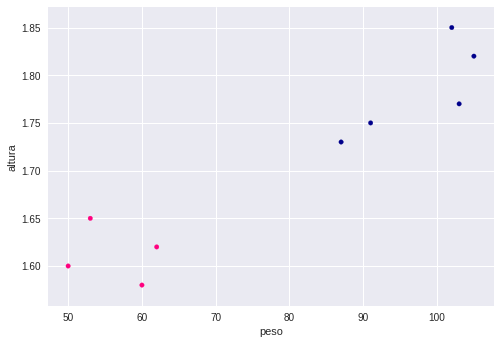

In [3]:
colors = {0:'#ff007f', 1:'#00008b'}

# Plotagem dos valores da base de treinamento
data.plot(kind='scatter', x='peso', y='altura',c=data['classe'].apply(lambda x: colors[x]))

Uma vez platado os dados da base de dados. Inserimos um novo objeto com intuito de conseguir a qual classe pertence esse novo objeto.

Dessa forma insere-se um dado individuo X com respectivos dados **Peso 77 kgs**  e **Altura 1.68**  para saber qual classe esse individuo pertence ? 

Marcamos um **X**  preto no plano cartesiano!!!



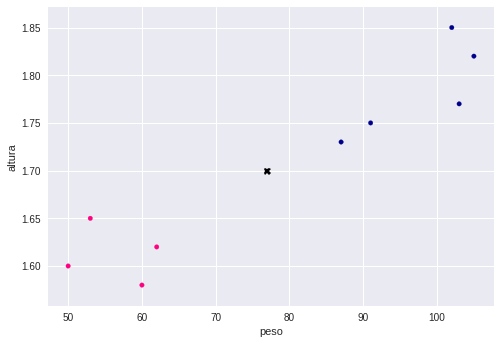

In [5]:
colors = {0:'#ff007f', 1:'#00008b'}
pesoX = 77
altX = 1.70
# Plotagem dos valores da base de treinamento
data.plot(kind='scatter', x='peso', y='altura',c=data['classe'].apply(lambda x: colors[x])) 
plt.plot(pesoX, altX, 'X', c='#000000')

O algoritmo k-NN entra em ação nesse exato momento, ele tem como principal função nesse caso ver quais pontos estão mais próximo do **X**  e desta forma classificar se ele é homem ou mulher apartir da moda dos pontos vizinhos. 



Para determinar os pontos mais próximos, os pontos vizinhos, utiliza-se a distância euclidiana para verificar qual ponto está mais próximo do **X**. A distância entre dois pontos pode ser calculada de diversas formas. A biblioteca do ScikitLearn lista [uma série de métricas de distância](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) que podem ser usadas. Vamos considerar um novo ponto e simular o que o algoritmo do KNN faz. e implementar o método o qual calcula a distância euclidiana.



No entanto, vamos trabalhar com o ponto {'altura': 1.68, 'peso':77} e calcular sua distância para todos os demais pontos. No exemplo vamos usar a distância euclideana: $\sqrt{\sum{(x_1 - x_2)^2 + (y_1 - y_2)^2}}$. Para simplificar, vamos utilizar nossa própria implementação da distância euclideana.

In [6]:
import math

# Calcula a distância euclideana de dois pontos
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)

    return math.sqrt(distance)

# Só para visualização: converte os valores para labels em String
def convert_label(value):
    if value == 0.0: return 'Mulher'
    else: return 'Homem'
    
dicHM ={}


# 0 = mulher , 1 = homem
for index, row in data.iterrows():
    print(convert_label(row['classe']), '%0.2f' % euclideanDistance([row['peso'], row['altura']],[77, 1.68], 2))
    # Colando os valores das distâncias em um dicionário
    valor = '%0.2f' %(euclideanDistance([row['peso'], row['altura']],[77, 1.68], 2))
    dicHM[float(valor)]= convert_label(row['classe'])

('Mulher', '27.00')
('Mulher', '24.00')
('Mulher', '17.00')
('Mulher', '15.00')
('Homem', '14.00')
('Homem', '25.00')
('Homem', '28.00')
('Homem', '26.00')
('Homem', '10.00')


Uma vez calculada a distância euclidiana do individuo X de todos os pontos de treinamento, ordena as distâncias dos pontos em ordem crescente.

In [7]:
sorted(dicHM)
print dicHM.items()

[(10.0, 'Homem'), (14.0, 'Homem'), (15.0, 'Mulher'), (17.0, 'Mulher'), (24.0, 'Mulher'), (25.0, 'Homem'), (26.0, 'Homem'), (27.0, 'Mulher'), (28.0, 'Homem')]


Uma vez ordenado os valores dos pontos de distância, o valor de K determina o número  de pontos os quais iremos comparar com o **X** para determinar  o genero do mesmo. Suponha que o **k seja 3**. 

Logo o número de vizinhos será de 3 a moda entre eles definirá qual será o genero de **X**.


In [8]:
valor = dicHM.values()
distancia = dicHM.keys()
k = input ("Digite o numero do K que deseja:")
print
h = 0
f = 0
for i in range(k):
  print (distancia[i], valor[i])
  if valor[i]=="Homem":
    h = h+1
  else :
    f = f+1
if f>h :
  classe = '0'
else:
    classe = '1'


Digite o numero do K que deseja:5

(10.0, 'Homem')
(14.0, 'Homem')
(15.0, 'Mulher')
(17.0, 'Mulher')
(24.0, 'Mulher')


Tendo em vista o resultado para k sendo 3 o **X** seria classificado como Homem.


In [9]:
if classe == '1':
  print ('O inviduo X é Homem pela frequência dos vizinhos')
else:
  print ('O inviduo X é Mulher pela frequência dos vizinhos')
 

O inviduo X é Mulher pela frequência dos vizinhos
